In [1]:
# read variables iwc,zKu, iwc_label and zw_label from file cloudSat_thr01.nc
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import matplotlib



In [2]:
import pickle
from kazrRet import *
d=pickle.load(open('iwcCoeff.pkl','rb'))
iwcCoeff=d['iwcCoeff']
peak=d['peak']
iwcCoeff_SSRG=np.polyfit(zST[2,:],np.log10(iwcST[2,:]),1)
print(iwcCoeff_SSRG)
#print(iwcCoeff)

[ 0.08061103 -1.50649553]


In [4]:

dnCoeff=np.array([0.01381017, 0.54397871])
dnCoeff=np.array([0.01975583*2.5, 0.22])
dn1D=np.polyval(dnCoeff,range(50))


In [5]:
with nc.Dataset('kext_atm_allChannels.nc','r') as f:
    kext_atm=f.variables['kext_atm'][:]
    kext_atm=np.array(kext_atm)

with nc.Dataset('profiles.nc','r') as f:
    qv=f.variables['qv'][:]
    press=f.variables['press'][:]
    temp=f.variables['temp'][:]
    tempm=f.variables['tempm'][:]
    pressf=f.variables['pressf'][:]
    rho=f.variables['rho'][:]
#print(qv.shape)
#print(temp[0,:])
#print(press[0,:])
kextCoeffL=[np.polyfit(zST[k,:200],np.log10(kextST[k,:200]),1) for k in range(4)]

npart=4
undef=0.0
nrefl=2
ice_type=1
import lidarSim as lidar
def get_pnorm(nz,dr,temp1,pres1,presf1,qv1,iwc1,rho1,dm_ice):
    h1=dr/2+np.arange(nz)*dr
    h1f=np.arange(nz)*dr
    q_lsice1=iwc1/rho1*1e-3
    q_lsice=q_lsice1[np.newaxis,:]
    pres1=pres1[np.newaxis,:]
    presf1=presf1[np.newaxis,:]
    temp1=temp1[np.newaxis,:]
    q_lsliq=np.zeros((1,nz),float)
    ls_radice=dm_ice/2*1e-3
    ls_radice=ls_radice[np.newaxis,:]
    ls_radliq=np.zeros((1,nz),float)
    q_cvice=np.zeros((1,nz),float)
    cv_radice=np.zeros((1,nz),float)
    q_cvliq=np.zeros((1,nz),float)
    cv_radliq=np.zeros((1,nz),float)
    temp=temp1
    pres=pres1
    presf=presf1
    pmol,pnorm,pnorm_perp_tot,\
        tautot,betatot_liq,\
        betatot_ice,\
        betatot,refl, \
        zheight,\
        beta_mol, tau_mol,\
        alpha= lidar.lidar_simulator(npart,nrefl,undef,\
                                     pres1,presf1,\
                                     temp1,
                                     q_lsliq,q_lsice,\
                                     q_cvliq,\
                                     q_cvice,\
                                     ls_radliq,\
                                     ls_radice,\
                                     cv_radliq,cv_radice,\
                                     ice_type)
    return pmol,pnorm


In [3]:
from csIO import *
import numpy as np
import matplotlib.pyplot as plt

def process(dbz,cpr_cmask,temp,iwc,re,height,iwp):
    a=np.nonzero(np.array(iwp)>0)
    b=np.nonzero(temp[a].max(axis=1)>280)
    a=a[0][b]
    temp0L=[]
    isfcPrecip=0
    iwp1L=[]
    iwp2L=[]
    iwcL=[]
    reL=[]
    zwL=[]
    iL=[]
    dbzL=[]
    ikL=[]
    hL=[]
    for i in a[0:]:
        b1=np.nonzero(temp[i]<273.15)
        ik=b1[0][-1]
        nprecip1=np.nonzero(cpr_cmask[i,ik:100]>30)
        #print(height[i,ik+3-40:ik+3])
        #stop:
        #print(ik,len(nprecip1[0]))
        temp0L.append(ik)
        if(len(nprecip1[0])>3):
            isfcPrecip+=1
            #print(cpr_cmask[i,ik:100])
            #print(nprecip1[0])
            dbz[i,:]=-99
        else:
            if ik+3-40>0:
                iwp1L.append(iwp[i])
                iwp2L.append(iwc[i,ik+3-50:ik+3].data.sum()*0.24)
                iwcL.append(iwc[i,:])
                reL.append(re[i,:])
                zwL.append(dbz[i,ik+3-50:ik+3])
                iL.append(i)
                dbzL.append(dbz[i,:])
                ikL.append(ik)
                hL.append(height[i,ik+3])
    return iwp1L,iwp2L,zwL,iwcL,reL,iL,dbzL,ikL,hL

fs=sorted(glob.glob("data/2019*hdf"))
fs_2B=sorted(glob.glob("CloudSat_2B/2019*hdf"))
import xarray as xr
import lidarSim as lidSim
fisot=2.7


In [8]:
import pickle
from kazrRet import *
import netCDF4 as nc
d=pickle.load(open('iwcCoeff.pkl','rb'))
iwcCoeff=d['iwcCoeff']
peak=d['peak']
iwcCoeff_SSRG=np.polyfit(zST[2,:],np.log10(iwcST[2,:]),1)
print(iwcCoeff_SSRG)

zkuCoeff=np.polyfit(zST[2,:30],(zST[0,:30]),1)
dmCoeff=np.polyfit(zST[2,:],np.log10(dmST[2,:]),1)
zwCoeff=np.polyfit(np.log10(iwcST[2,:30]),zST[2,:30],1)
iwcLowCoeff=np.polyfit(zST[2,:200],np.log10(iwcST[2,:200]),1)
kextCoeffL=[np.polyfit(zST[k,:200],np.log10(kextST[k,:200]),1) for k in range(5)]
with nc.Dataset('kext_atm_allChannels.nc','r') as f:
    kext_atm=f.variables['kext_atm'][:]
    kext_atm=np.array(kext_atm)

with nc.Dataset('profiles.nc','r') as f:
    qv=f.variables['qv'][:]
    press=f.variables['press'][:]
    temp=f.variables['temp'][:]
    tempm=f.variables['tempm'][:]
    pressf=f.variables['pressf'][:]
    rho=f.variables['rho'][:]
#print(qv.shape)
#print(temp[0,:])
#print(press[0,:])
kextCoeffL=[np.polyfit(zST[k,:200],np.log10(kextST[k,:200]),1) for k in range(4)]

npart=4
undef=0.0
nrefl=2
ice_type=1
import lidarSim as lidar
def get_pnorm(nz,dr,temp1,pres1,presf1,qv1,iwc1,rho1,dm_ice):
    h1=dr/2+np.arange(nz)*dr
    h1f=np.arange(nz)*dr
    q_lsice1=iwc1/rho1*1e-3
    q_lsice=q_lsice1[np.newaxis,:]
    pres1=pres1[np.newaxis,:]
    presf1=presf1[np.newaxis,:]
    temp1=temp1[np.newaxis,:]
    q_lsliq=np.zeros((1,nz),float)
    ls_radice=dm_ice/2*1e-3
    ls_radice=ls_radice[np.newaxis,:]
    ls_radliq=np.zeros((1,nz),float)
    q_cvice=np.zeros((1,nz),float)
    cv_radice=np.zeros((1,nz),float)
    q_cvliq=np.zeros((1,nz),float)
    cv_radliq=np.zeros((1,nz),float)
    temp=temp1
    pres=pres1
    presf=presf1
    pmol,pnorm,pnorm_perp_tot,\
        tautot,betatot_liq,\
        betatot_ice,\
        betatot,refl, \
        zheight,\
        beta_mol, tau_mol,\
        alpha= lidar.lidar_simulator(npart,nrefl,undef,\
                                     pres1,presf1,\
                                     temp1,
                                     q_lsliq,q_lsice,\
                                     q_cvliq,\
                                     q_cvice,\
                                     ls_radliq,\
                                     ls_radice,\
                                     cv_radliq,cv_radice,\
                                     ice_type)
    return pmol,pnorm



[ 0.08061103 -1.50649553]


In [29]:
from scipy.ndimage import gaussian_filter1d

def simulateObs(dbzL,iwcL):
    umu=np.cos(np.deg2rad(0.0))
    nt1,nz=qv.shape
    height=np.arange(nz+1)*0.240
    nt=len(dbzL)
    dbzL=np.array(dbzL)
    iwcL=np.array(iwcL)
    iwc_SSRG=np.zeros((nt,50),float)
    dm_SSRG=np.zeros((nt,50),float)
    print(nt,iwc_SSRG.shape)



    tbL=[]
    epsL=[]
    zKu=np.zeros((nt,50),float)-99.9
    zKuL=[]
    pnormL=[]
    dm_SSRGL=[]
    dnL=[]
    ifreqC=[0,1,2,3,3,3,3,3,3,4,4,4]

    pmolL=[]
    emis=0.8+0.2*np.random.random()*0.2
    iwpL=[]
    for i in range(0,nt):
        i1=i
        zw1=dbzL[i1,ikL[i1]-50+3:ikL[i1]+3][::-1]
        iwc1D=iwcL[i1,ikL[i1]-50+3:ikL[i1]+3][::-1]
        a1=np.nonzero(iwc1D>0)
        kextI=np.zeros((50,12),float)
        salbI=np.zeros((50,12),float)
        asymI=np.zeros((50,12),float)
        ic=np.random.randint(0,30)
        kext1D=kext_atm[ic,:,:].copy()
        salb1D=np.zeros((64,12),float)
        asym1D=np.zeros((64,12),float)
        dnp=np.random.randn(64)
        dnp=gaussian_filter1d(dnp,2)
        dn1Dp=0*dnp
        iwcsum=iwc1D.sum()
        for k in a1[0]:
            zw11=zw1[k]+0
            if zw11>30:
                zw11=30
            dn1Dp[k]=1.5
            ifind = lidSim.bisection2(zST[2,:],zw1[k]-10*(dn1Dp[k]))
            iwc_SSRG[i,k]=iwcST[2,ifind]*10**(dn1Dp[k])
            zKu[i,k]=zST[0,ifind]+10*(dn1Dp[k])
            dm_SSRG[i,k]=10**(dmCoeff[0]*(zw1[k]-10*dn1Dp[k])+dmCoeff[1]+dn1Dp[k])
            dz=zST[2,ifind+1]-zST[2,ifind]
            w1=(zw11-10.*dn1Dp[k]-zST[2,ifind])/dz
            z1ku=zST[0,ifind]*w1+zST[0,ifind+1]*(1-w1)+10*dn1Dp[k]
            iwc1=(iwcST[2,ifind]*w1+iwcST[2,ifind+1]*(1-w1))*10**dn1Dp[k]
            dm1=(dmST[2,ifind]*w1+dmST[2,ifind+1]*(1-w1))
            
            for ifreq in range(12):
                ifreq1=ifreqC[ifreq]
                kextI[k,ifreq]=kextST[ifreq1,ifind]*10**(dn1Dp[k])
                salbI[k,ifreq]=kscaST[ifreq1,ifind]*10**(dn1Dp[k])
                asymI[k,ifreq]=gST[ifreq1,ifind]
        nz=50
        dr=0.240
        temp1=temp[ic,14:64]
        pres1=press[ic,14:64]
        presf1=pressf[ic,14:65]
        qv1=qv[ic,14:64]
        iwc1=iwc_SSRG[i,:]
        rho1=pres1/(287.05*temp1)
        dm_ice=dm_SSRG[i,:]
        dnL.append(dn1Dp.copy())
        pmol,pnorm=get_pnorm(nz,dr,temp1,pres1,presf1,qv1,iwc1,rho1,dm_ice)
    
        kext1D[14:64,:]+=kextI[:,:]
        salb1D[14:64,:]=salbI[:,:]
        asym1D[14:64,:]=asymI[:,:]
        salb1D/=kext1D
        emis=0.9*emis+(0.8+np.random.random()*0.2)*0.1
        ebar=emis
        tb1=[]
        for ik in range(2,12):
        #print(dn1Dp)
            tbout = lidSim.radtran(umu,temp[ic][0],temp[ic],height,kext1D[:,ik],salb1D[:,ik],asym1D[:,ik],fisot,emis,ebar)
            tb1.append(tbout)
            if tbout!=tbout:
                stop
        tbL.append(tb1)
        zKuL.append(zKu[i,:])
        epsL.append(emis)
        dm_SSRGL.append(dm_ice)
        pnormL.append(pnorm[0,:])
        pmolL.append(pmol[0,:])
    return tbL,zKuL,epsL,dm_SSRGL,pnormL,dnL,pmolL,iwc_SSRG    


In [30]:
tb_dbaseL=[]
zKu_dbaseL=[]
pnorm_dbaseL=[]
iwc_dbaseL=[]
import tqdm
for i,f in tqdm.tqdm(enumerate(fs[:-14])):
    iwc,dbz_sim,temp2C,re,height,lonC,latC,iwp=read2C_ICE(f)
    fh=Dataset(fs_2B[i+14])
    dbz=fh['Radar_Reflectivity'][:]/100.
    cpr_cmask=fh['CPR_Cloud_mask'][:]
    iwp1L,iwp2L,zwL,iwcL,reL,iL,dbzL,ikL,hL_2C=process(dbz,cpr_cmask,temp2C,iwc,re,height,iwp)
    tbL,zKuL,epsL,dm_SSRGL,pnormL,dnL,pmolL,iwc_SSRG=simulateObs(dbzL[:],iwcL[:])
    tbL=np.array(tbL)
    zKuL=np.array(zKuL)
    pnormL=np.array(pnormL)
    iwc_SSRG=np.array(iwc_SSRG)
    iwc_dbaseL.extend(iwc_SSRG)
    tb_dbaseL.extend(tbL)
    zKu_dbaseL.extend(zKuL)
    pnorm_dbaseL.extend(pnormL)
    if len(tb_dbaseL)>500000:
        break
    

0it [00:00, ?it/s]

4394 (4394, 50)


1it [00:05,  5.14s/it]

7189 (7189, 50)


2it [00:13,  6.91s/it]

6841 (6841, 50)


3it [00:21,  7.46s/it]

5469 (5469, 50)


4it [00:27,  6.84s/it]

6431 (6431, 50)


5it [00:34,  7.07s/it]

6452 (6452, 50)


6it [00:42,  7.15s/it]

6668 (6668, 50)


7it [00:49,  7.25s/it]

5469 (5469, 50)


8it [00:55,  6.89s/it]

5037 (5037, 50)


9it [01:02,  6.85s/it]

3941 (3941, 50)


10it [01:07,  6.26s/it]

4411 (4411, 50)


11it [01:12,  5.85s/it]

4565 (4565, 50)


12it [01:17,  5.60s/it]

5832 (5832, 50)


13it [01:23,  5.84s/it]

4081 (4081, 50)


14it [01:27,  5.36s/it]

6242 (6242, 50)


15it [01:35,  5.97s/it]

5181 (5181, 50)


16it [01:42,  6.19s/it]

6587 (6587, 50)


17it [01:49,  6.60s/it]

5302 (5302, 50)


18it [01:55,  6.27s/it]

5909 (5909, 50)


19it [02:02,  6.52s/it]

7034 (7034, 50)


20it [02:11,  7.29s/it]

5503 (5503, 50)


21it [02:18,  7.21s/it]

4927 (4927, 50)


22it [02:23,  6.65s/it]

4820 (4820, 50)


23it [02:29,  6.33s/it]

4915 (4915, 50)


24it [02:35,  6.28s/it]

2857 (2857, 50)


25it [02:38,  5.45s/it]

5063 (5063, 50)


26it [02:45,  5.65s/it]

3549 (3549, 50)


27it [02:48,  4.98s/it]

4670 (4670, 50)


28it [02:54,  5.34s/it]

5117 (5117, 50)


29it [03:00,  5.44s/it]

5897 (5897, 50)


30it [03:08,  6.29s/it]

6945 (6945, 50)


31it [03:17,  7.18s/it]

5344 (5344, 50)


32it [03:23,  6.87s/it]

5950 (5950, 50)


33it [03:30,  6.75s/it]

6007 (6007, 50)


34it [03:37,  6.87s/it]

6135 (6135, 50)


35it [03:45,  7.06s/it]

4661 (4661, 50)


36it [03:50,  6.63s/it]

5280 (5280, 50)


37it [03:56,  6.48s/it]

4483 (4483, 50)


38it [04:01,  5.98s/it]

3128 (3128, 50)


39it [04:05,  5.31s/it]

4011 (4011, 50)


40it [04:10,  5.25s/it]

3854 (3854, 50)


41it [04:15,  5.03s/it]

6234 (6234, 50)


42it [04:21,  5.46s/it]

4883 (4883, 50)


43it [04:26,  5.34s/it]

6279 (6279, 50)


44it [04:32,  5.48s/it]

5662 (5662, 50)


45it [04:39,  6.06s/it]

4620 (4620, 50)


46it [04:45,  5.82s/it]

6472 (6472, 50)


47it [04:52,  6.24s/it]

6725 (6725, 50)


48it [05:00,  6.77s/it]

6892 (6892, 50)


49it [05:10,  7.76s/it]

4591 (4591, 50)


50it [05:15,  7.12s/it]

4144 (4144, 50)


51it [05:20,  6.28s/it]

5055 (5055, 50)


52it [05:26,  6.18s/it]

3295 (3295, 50)


53it [05:29,  5.43s/it]

3475 (3475, 50)


54it [05:34,  5.28s/it]

3475 (3475, 50)


55it [05:38,  4.92s/it]

7322 (7322, 50)


56it [05:47,  5.91s/it]

6096 (6096, 50)


57it [05:53,  6.06s/it]

4132 (4132, 50)


58it [05:58,  5.63s/it]

3587 (3587, 50)


59it [06:02,  5.22s/it]

4592 (4592, 50)


60it [06:07,  5.11s/it]

6356 (6356, 50)


61it [06:14,  5.69s/it]

6780 (6780, 50)


62it [06:22,  6.52s/it]

6477 (6477, 50)


63it [06:30,  6.97s/it]

5699 (5699, 50)


64it [06:36,  6.62s/it]

3755 (3755, 50)


65it [06:41,  5.97s/it]

4475 (4475, 50)


66it [06:46,  5.72s/it]

5788 (5788, 50)


67it [06:52,  5.87s/it]

3195 (3195, 50)


68it [06:56,  5.22s/it]

3407 (3407, 50)


69it [07:00,  4.91s/it]

7420 (7420, 50)


70it [07:09,  6.32s/it]

5442 (5442, 50)


71it [07:16,  6.44s/it]

5069 (5069, 50)


72it [07:22,  6.15s/it]

5585 (5585, 50)


73it [07:29,  6.48s/it]

6508 (6508, 50)


74it [07:36,  6.81s/it]

5360 (5360, 50)


75it [07:43,  6.84s/it]

6905 (6905, 50)


76it [07:50,  6.87s/it]

6815 (6815, 50)


77it [07:58,  7.04s/it]

5260 (5260, 50)


78it [08:04,  6.72s/it]

5263 (5263, 50)


79it [08:10,  6.64s/it]

3638 (3638, 50)


80it [08:14,  5.85s/it]

3662 (3662, 50)


81it [08:19,  5.58s/it]

4154 (4154, 50)


82it [08:25,  5.56s/it]

2266 (2266, 50)


83it [08:28,  4.88s/it]

5003 (5003, 50)


84it [08:34,  5.28s/it]

6493 (6493, 50)


85it [08:41,  5.74s/it]

4774 (4774, 50)


86it [08:46,  5.60s/it]

5438 (5438, 50)


87it [08:52,  5.56s/it]

4548 (4548, 50)


88it [08:57,  5.55s/it]

3557 (3557, 50)


89it [09:01,  5.15s/it]

5469 (5469, 50)


90it [09:07,  5.31s/it]

8274 (8274, 50)


91it [09:16,  6.43s/it]

6697 (6697, 50)


92it [09:25,  7.20s/it]

5206 (5206, 50)


93it [09:32,  7.14s/it]

3461 (3461, 50)


94it [09:37,  6.38s/it]

3490 (3490, 50)


95it [09:41,  5.64s/it]

5065 (5065, 50)


95it [09:47,  6.18s/it]


In [31]:
print(len(dbzL))
import xarray as xr
tb_dbaseL=np.array(tb_dbaseL)
zKu_dbaseL=np.array(zKu_dbaseL)
pnorm_dbaseL=np.array(pnorm_dbaseL)
iwc_dbaseL=np.array(iwc_dbaseL)
ds=xr.Dataset({'tb':(['n','nf'],tb_dbaseL),'zKu':(['n','nz'],zKu_dbaseL),'pnorm':(['n','nz'],pnorm_dbaseL),'iwc':(['n','nz'],iwc_dbaseL)})
ds.to_netcdf('simulatedObs_IGARSS.nc',encoding={'tb':{'zlib':True,'complevel':9},'zKu':{'zlib':True,'complevel':9},'pnorm':{'zlib':True,'complevel':9},'iwc':{'zlib':True,'complevel':9}})

5065


In [ ]:
import matplotlib
print(len(tb_dbaseL))
iwp_dbase=iwc_dbaseL.sum(axis=1)*240
a=np.array(iwp_dbase>1)
h1=plt.hist(iwp_dbase[a],bins=10**np.linspace(0,3.5,35))
plt.xscale('log')
print(len(iwp_dbase[a]))
plt.figure()
plt.scatter(tb_dbaseL[a,-1],iwp_dbase[a])
#plt.plot(iwc_dbaseL.mean(axis=0),range(50))

In [92]:
x_lid_radiom_L=[]
x_lid_radiom_radar_L=[]
yL=[]
for i in range(0,tb_dbaseL.shape[0]):
    x1=[]
    x1.extend(tb_dbaseL[i,:]+np.random.randn(10)*3)
    x2=pnorm_dbaseL[i,:]*np.exp(0.5*np.random.randn(50))
    x2[x2<1e-7]=1e-7
    x1.extend(np.log10(x2))
    x_lid_radiom_L.append(x1)
    z1=zKu_dbaseL[i,:]
    z1[z1<8]=0
    x1.extend(z1)
    x_lid_radiom_radar_L.append(x1)
    yL.append(iwc_dbaseL[i,:])


In [93]:
#import sklearn knn regressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
knn_lid_radiom=KNeighborsRegressor(n_neighbors=15,weights='distance',algorithm='auto',leaf_size=30,p=2,metric='minkowski',metric_params=None,n_jobs=1)
knn_lid_radiom_radar=KNeighborsRegressor(n_neighbors=15,weights='distance',algorithm='auto',leaf_size=30,p=2,metric='minkowski',metric_params=None,n_jobs=1)
knn_radiom=KNeighborsRegressor(n_neighbors=15,weights='distance',algorithm='auto',leaf_size=30,p=2,metric='minkowski',metric_params=None,n_jobs=1)

knn_lid_radiom.fit(xL[1000:],yL[1000:])
knn_lid_radiom_radar.fit(x_lid_radiom_radar_L[1000:],yL[1000:])
x_lid_radiom_L=np.array(x_lid_radiom_L)
knn_radiom.fit(x_lid_radiom_L[1000:,:10],yL[1000:])

KNeighborsRegressor(n_jobs=1, n_neighbors=15, weights='distance')

In [94]:
y_pred_lid_radiom=knn_lid_radiom.predict(xL[:900])
y_pred_lid_radiom_radar=knn_lid_radiom_radar.predict(x_lid_radiom_radar_L[:900])
y_pred_radiom=knn_radiom.predict(x_lid_radiom_L[:900,:10])

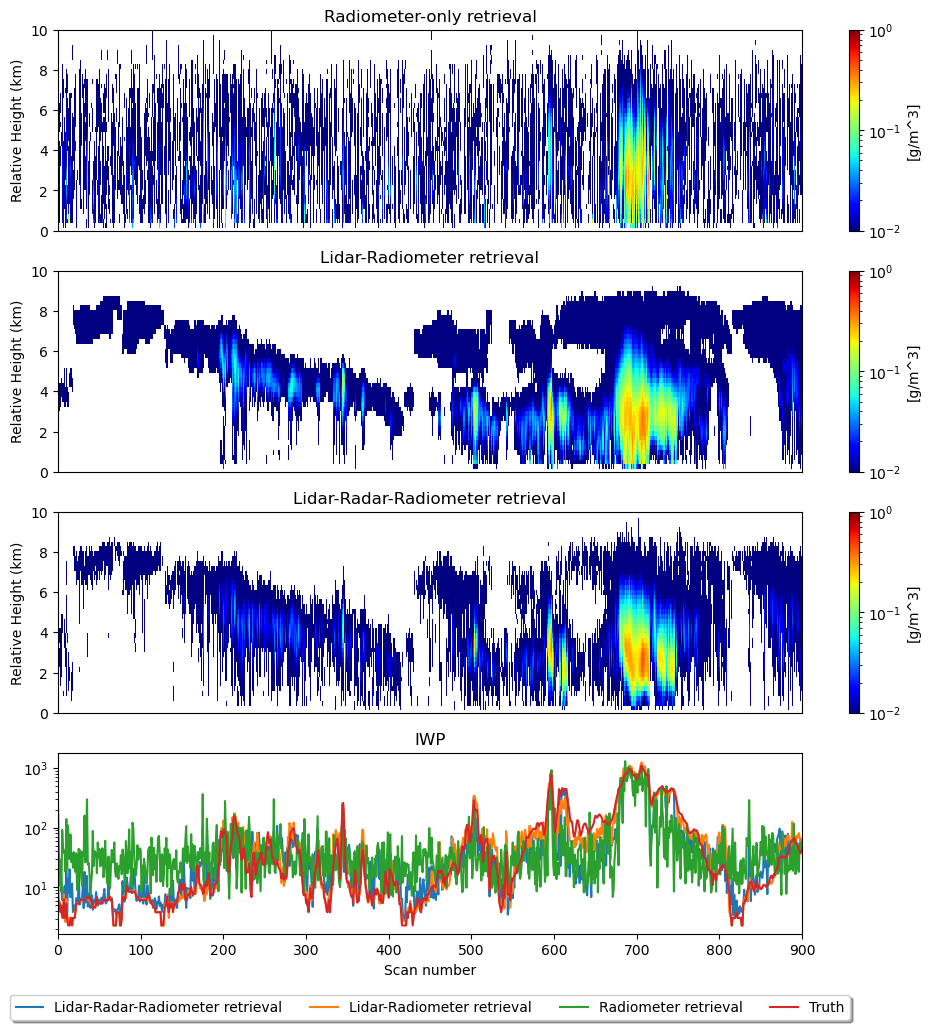

In [114]:
#print(y_pred.shape)
#print(np.corrcoef(y_pred[:,:].sum(axis=1),iwp_dbase[:900])[0,1])

plt.figure(figsize=(12,12))
iwcLm=np.ma.array(y_pred_radiom,mask=y_pred_radiom<2e-3)
plt.subplot(411)
plt.pcolormesh(np.arange(900),np.arange(50)*0.24,iwcLm[:900,:].T,cmap='jet',norm=matplotlib.colors.LogNorm(vmin=1e-2,vmax=1e-0))
plt.ylim(0,10)
plt.ylabel('Relative Height (km)')
plt.xticks([])
cbar=plt.colorbar(orientation='vertical')
cbar.ax.set_ylabel('[g/m^3]')
plt.title('Radiometer-only retrieval')
plt.subplot(412)
iwcLm=np.ma.array(y_pred_lid_radiom,mask=y_pred_lid_radiom<2e-3)
plt.pcolormesh(np.arange(900),np.arange(50)*0.24,iwcLm[:900,:].T,cmap='jet',norm=matplotlib.colors.LogNorm(vmin=1e-2,vmax=1e-0))
plt.ylim(0,10)
plt.ylabel('Relative Height (km)')
plt.xticks([])
cbar=plt.colorbar(orientation='vertical')
cbar.ax.set_ylabel('[g/m^3]')
plt.title('Lidar-Radiometer retrieval')

ax3=plt.subplot(413)
iwcLm=np.ma.array(y_pred_lid_radiom_radar,mask=y_pred_lid_radiom_radar<2e-3)
plt.pcolormesh(np.arange(900),np.arange(50)*0.24,iwcLm[:900,:].T,cmap='jet',norm=matplotlib.colors.LogNorm(vmin=1e-2,vmax=1e-0))
plt.ylim(0,10)
plt.ylabel('Relative Height (km)')
#plt.xlabel('Scan number')
cbar=plt.colorbar(orientation='vertical')
cbar.ax.set_ylabel('[g/m^3]')
plt.title('Lidar-Radar-Radiometer retrieval')
plt.xticks([])
ax4=plt.subplot(414)
b1=ax3.get_position(original=False)
b0=ax4.get_position(original=False)
ax4.set_position([b0.x0,b0.y0+b1.height*0.1,b1.width,b1.height*0.9])
plt.plot(range(900),y_pred_lid_radiom_radar[:900,:].sum(axis=1)*240,label='Lidar-Radar-Radiometer retrieval')
plt.plot(range(900),y_pred_lid_radiom[:900,:].sum(axis=1)*240,label='Lidar-Radiometer retrieval')
plt.plot(range(900),y_pred_radiom[:900,:].sum(axis=1)*240,label='Radiometer retrieval')
plt.plot(range(900),iwc_dbaseL[:900,:].sum(axis=1)*240,label='Truth')
ax4.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3),
          fancybox=True, shadow=True, ncol=4)
plt.yscale('log')
plt.xlabel('Scan number')
#plt.legend()
plt.title('IWP')
plt.xlim(0,900)
plt.savefig('IWC_Retrievals_Noise.png',dpi=300,bbox_inches='tight')


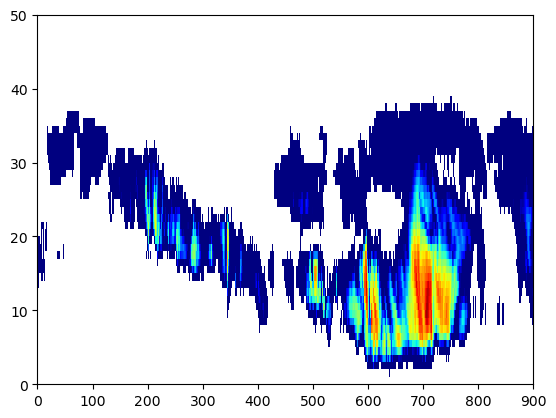

In [17]:
iwc_SSRGm=np.ma.array(iwc_SSRG,mask=iwc_SSRG<1e-3)
plt.pcolormesh(iwc_SSRGm[:900,:].T,cmap='jet',norm=matplotlib.colors.LogNorm(vmin=1e-2,vmax=5e-1))

Bbox(x0=0.125, y0=0.7126086956521739, x1=0.7450000000000001, y1=0.88)


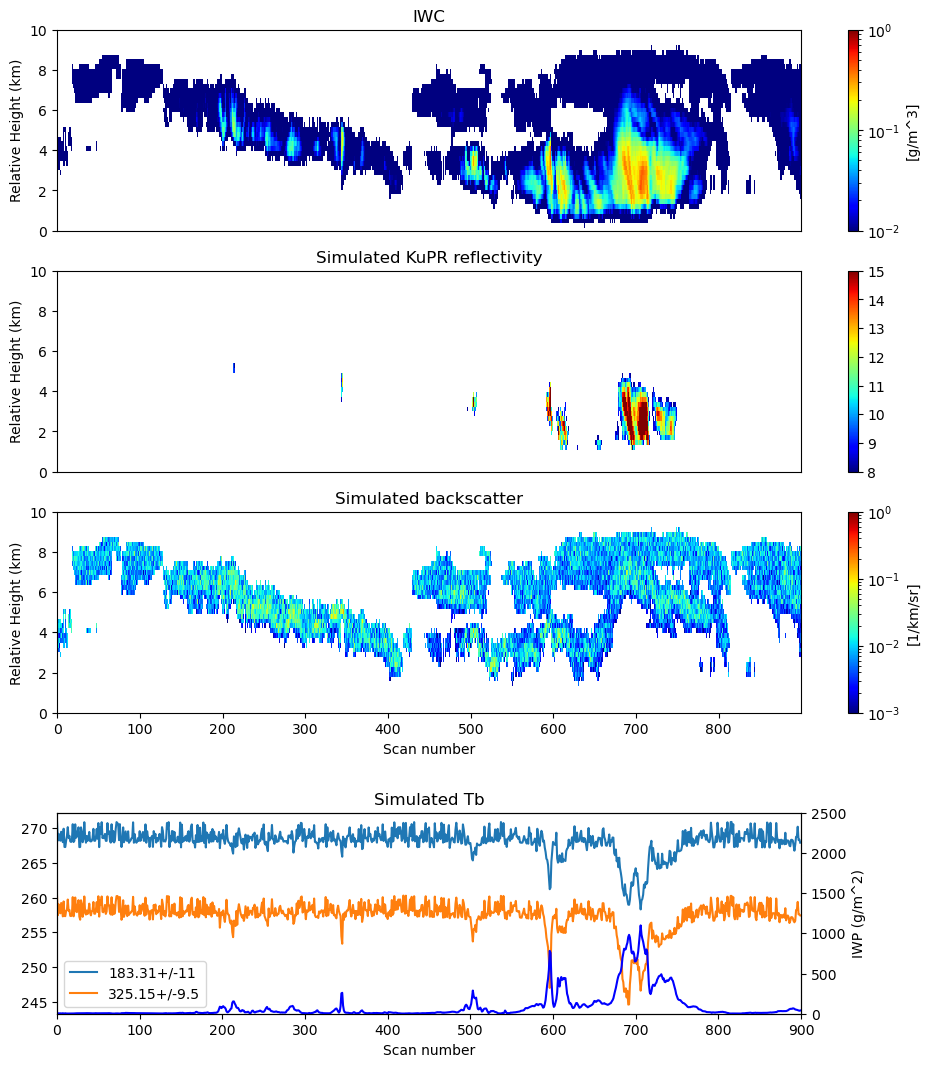

In [19]:
#bscatL=np.array(bscatL)
#print(bscatL.max())
tbL=np.array(tbL)
pnormL=np.array(pnormL)
ss=np.shape(pnormL)
zKuL=np.array(zKuL)
zKuLm=np.ma.array(zKuL,mask=zKuL<8)
import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.subplot(4,1,2)
im1=plt.pcolormesh(np.arange(900),np.arange(50)*0.24,zKuLm[:900,:].T,cmap='jet',vmin=8,vmax=15)
plt.title('Simulated KuPR reflectivity')
plt.xticks([])
#plt.contour(np.arange(900),np.arange(50)*0.24,zKuL[:900,:].T,levels=[-10],linestyle='--',colors='k')
plt.ylim(0,10)
plt.ylabel('Relative Height (km)')
cbar=plt.colorbar(im1,orientation='vertical')
#cbar.ax.set_ylabel('[1/km/sr]')
plt.subplot(4,1,3)
pnormLm=np.ma.array(pnormL,mask=pnormL<2e-6)
plt.pcolormesh(np.arange(900),np.arange(50)*0.24,1e3*pnormLm.T*np.exp(0.5*np.random.randn(ss[1],ss[0])),cmap='jet',norm=matplotlib.colors.LogNorm(vmin=1e-3,vmax=1e-0))
plt.ylim(0,10)
plt.title('Simulated backscatter')
plt.xlabel('Scan number')
plt.ylabel('Relative Height (km)')
cbar=plt.colorbar(orientation='vertical')
# add labels to the colorbar
cbar.ax.set_ylabel('[1/km/sr]')
ax1=plt.subplot(4,1,1)
#plt.pcolormesh(np.array(iwcL)[0:900,::-1].T,cmap='jet')
#iwc2C_ICE=[iwcL[i1,ikL[i1]-60+3:ikL[i1]+3][::-1] for i1 in range(900)]
iwc2C_ICE=np.array(iwc_SSRG[:,::-1])
iwcLm=np.ma.array(iwc_SSRG,mask=iwc_SSRG<1e-6)
plt.pcolormesh(np.arange(900),np.arange(50)*0.24,iwcLm[:900,:].T,cmap='jet',norm=matplotlib.colors.LogNorm(vmin=1e-2,vmax=1e-0))
plt.ylim(0,10)
plt.ylabel('Relative Height (km)')
plt.xticks([])
cbar=plt.colorbar(orientation='vertical')
cbar.ax.set_ylabel('[g/m^3]')
plt.title('IWC')
ax=plt.subplot(4,1,4)
b0=ax.get_position(original=False)
b1=ax1.get_position(original=False)
ax.set_position([b0.x0,b0.y0-0.05,b1.width,b1.height])
print(b1)
#plt.plot(np.arange(900),tbL[:,0])
#plt.plot(np.arange(900),tbL[:,1])
plt.plot(np.arange(900),tbL[:,-4],label='183.31+/-11')
plt.plot(np.arange(900),tbL[:,-1],label='325.15+/-9.5')
plt.title('Simulated Tb')
plt.legend()
plt.xlim(0,900)
plt.xlabel('Scan number')
ax3 = ax.twinx()
ax.set_position([b0.x0,b0.y0-0.05,b1.width,b1.height])
ax3.plot(range(900),iwc_SSRG[0:900,:].sum(axis=1)*240,color='blue')
ax3.set_ylabel('IWP (g/m^2)')
ax3.set_ylim(0,2500)
plt.savefig('sim_AOS_Inclinded_test.png',dpi=300,bbox_inches='tight')


In [97]:
tb1=tbL[:900,-1]
iwp=iwc_SSRG[0:900,:].sum(axis=1)*240
print(tb1.shape)
print(iwp.shape)
print(np.corrcoef(tb1,iwp))

(900,)
(900,)
[[ 1.         -0.89899327]
 [-0.89899327  1.        ]]


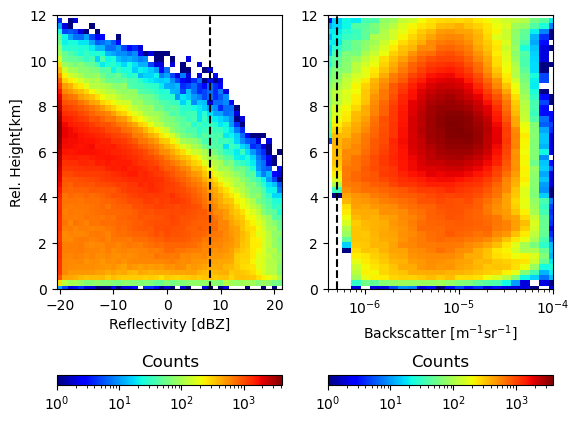

In [23]:
fig=plt.figure()
plt.subplot(121)
plt.pcolormesh(-20+np.arange(42),np.arange(50)*0.24,\
                zcfad[:,:].T,norm=matplotlib.colors.LogNorm(),cmap='jet')
plt.plot([8,8],[0,50*0.24],'k--')
plt.ylim(0,12)
ax = plt.gca()  
box = ax.get_position()
plt.xlabel("Reflectivity [dBZ]")
plt.ylabel("Rel. Height[km]")
ax.set_position([box.x0, box.y0+0.2, box.width, box.height-0.2])

cax1=fig.add_axes([box.x0, box.y0, box.width, 0.02])
cb1=plt.colorbar(cax=cax1,orientation='horizontal')
cb1.ax.set_title('Counts')
plt.subplot(122)
plt.pcolormesh(10**(-7+np.arange(50)*0.1),\
    0+np.arange(50)*0.24,bcfad2[:,:].T,norm=matplotlib.colors.LogNorm(),cmap='jet')
plt.plot([5e-7,5e-7],[0,50*0.24],'k--')
plt.xscale('log')
plt.ylim(0,12)
#plt.xlim(0.01,1)
ax = plt.gca()  
box = ax.get_position()
plt.xlabel("Backscatter [m$^{-1}$sr$^{-1}$]")
plt.xlim(4e-7,1e-4)
#plt.ylabel("Height[km]")
ax.set_position([box.x0, box.y0+0.2, box.width, box.height-0.2])

cax1=fig.add_axes([box.x0, box.y0, box.width, 0.02])
cb1=plt.colorbar(cax=cax1,orientation='horizontal')
cb1.ax.set_title('Counts')
plt.savefig('fig03.rev.png')

[0.22       0.26938957 0.31877915 0.36816872 0.4175583  0.46694788
 0.51633745 0.56572702 0.6151166  0.66450617 0.71389575 0.76328532
 0.8126749  0.86206447 0.91145405 0.96084362 1.0102332  1.05962278
 1.10901235 1.15840192 1.2077915  1.25718107 1.30657065 1.35596023
 1.4053498  1.45473937 1.50412895 1.55351852 1.6029081  1.65229768
 1.70168725 1.75107682 1.8004664  1.84985597 1.89924555 1.94863512
 1.9980247  2.04741427 2.09680385 2.14619342 2.195583   2.24497258
 2.29436215 2.34375173 2.3931413  2.44253088 2.49192045 2.54131003
 2.5906996  2.64008917]
[0.04938957 0.22      ]


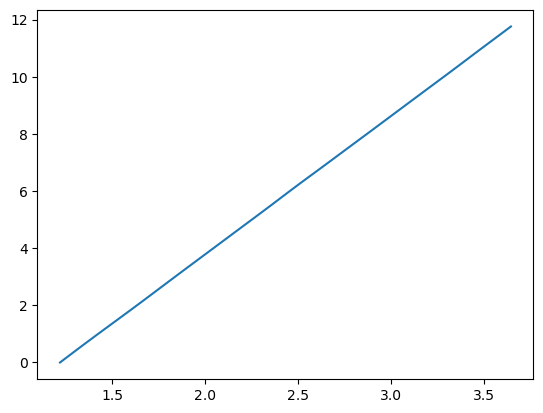

In [104]:
#print(salb1D[:,ik])
plt.plot(np.array(dnL).mean(axis=0),np.arange(50)*0.240)
print(np.polyval(dnCoeff,range(50)))
print(dnCoeff)

In [109]:
import xarray as xr
ds=xr.Dataset({'tb':(['time','chan'],tbL),
                'zKu':(['time','height'],zKuL),
                'pnorm':(['time','height'],1e3*np.array(pnormL)),
                'iwc_SSRG':(['time','height'],iwc_SSRG),
                'iwcCS':(['time','height'],iwc),
                'eps':(['time'],epsL),
                'dm_SSRG':(['time','height'],dm_SSRGL),
                'dnw':(['time','height'],dnL),
                'pmol':(['time','height'],1e3*np.array(pmolL))},
                coords={'time':np.arange(len(tbL)),
                        'chan':np.arange(10),
                        'height':np.arange(50)})

ds.to_netcdf('simObsCrossTrack_2dn_extended.nc',format='NETCDF4',encoding={'tb':{'zlib':True,'complevel':5},\
    'zKu':{'zlib':True,'complevel':5},'iwc_SSRG':{'zlib':True,'complevel':5},'iwcCS':{'zlib':True,'complevel':5},\
        'pnorm':{'zlib':True,'complevel':5},'dm_SSRG': {'zlib': True, 'complevel': 9},\
        'eps':{'zlib':True,'complevel':5},'dnw':{'zlib':True,'complevel':5},'pmol':{'zlib':True,'complevel':5}})  



[0.20569369 1.62035163]
6.309573444801933


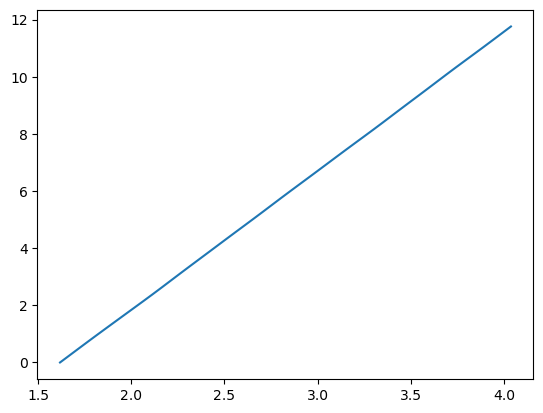

In [51]:
plt.plot(np.array(dnL).mean(axis=0),np.arange(50)*0.24)
dnm=np.array(dnL).mean(axis=0)
dnCoeff=np.polyfit(np.arange(50)*0.24,dnm,1)
print(dnCoeff)
print(10**0.8)

In [150]:
print(np.array(pnormL).shape)
#print(tbL)
#write ds to a compressed netcdf file using encoding
#ds.to_netcdf('simObsInclined.nc',format='NETCDF4',encoding={'tb':{'zlib':True,'complevel':5},
#'zKu':{'zlib':True,'complevel':5},'eps':{'zlib':True,'complevel':5}})  




(10, 1, 50)


0.06873033762232066
0.078562036
[[1.         0.92743434]
 [0.92743434 1.        ]]


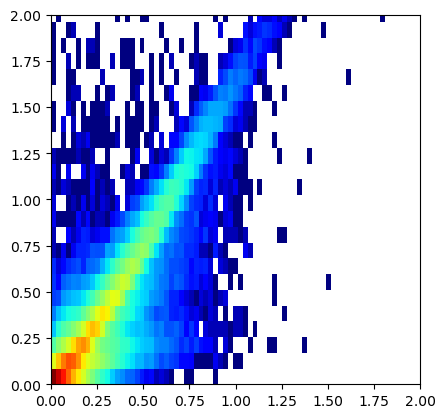

In [105]:
#print(dn1D)
a=np.nonzero(iwc_SSRG>0)
print(iwc_SSRG[a].mean())
print(iwc[a].mean())
print(np.corrcoef(iwc_SSRG[a],iwc[a]))
ax=plt.subplot(111)
iwc_hist2d=plt.hist2d(iwc_SSRG[a],iwc[a],bins=100,cmap='jet',norm=matplotlib.colors.LogNorm())
plt.xlim(0,2)
plt.ylim(0,2)
ax.set_aspect('equal')